# Network Action of SCCwm-DBS
## Network Support : Group Level

In this notebook we'll regenerate the figures related to analysing the network support of SCCwm-DBS.

> Network Support : Where in the network, local to the stimulation or remote to the stimulation, do we see changes throughout the stimulation time.

## Setup




## LFP Response


In [6]:
from dbspace.control import network_action
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale=4)
sns.set_style("white")


/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are depr

Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Delta
KstestResult(statistic=0.5, pvalue=0.474025974025974)
OffT Ttest_1sampResult(statistic=array([[1.95274127],
       [1.95274127],
       [1.95274127],
       [1.95274127],
       [1.95274127]]), pvalue=array([[0.10828943],
       [0.10828943],
       [0.10828943],
       [0.10828943],
       [0.10828943]]))
Theta
KstestResult(statistic=0.8333333333333334, pvalue=0.025974025974025972)
OffT Ttest_1sampResult(statistic=array([[1.47609361],
       [1.47609361],
       [1.47609361],
       [1.47609361],
       [1.47609361]]), pvalue=array([[0.19994624],
       [0.19994624],
       [0.19994624],
       [0.19994624],
       [0.19994624]]))
Alpha
KstestResult(statistic=1.0, pvalue=0.0021645021645021645)
OffT Ttest_1sampResult(statistic=array

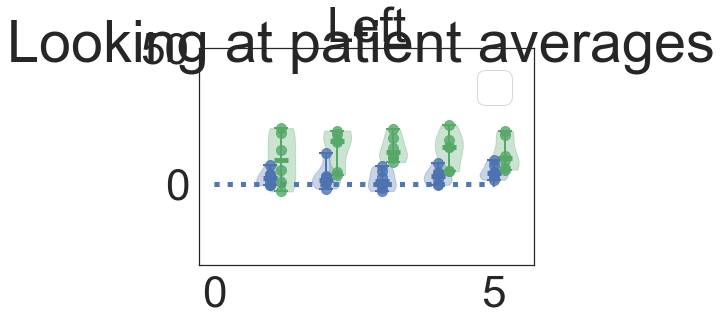

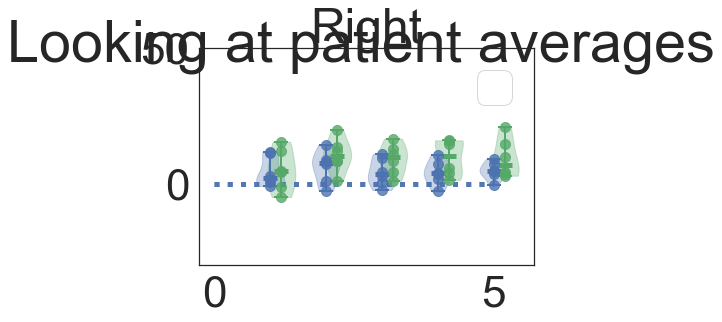

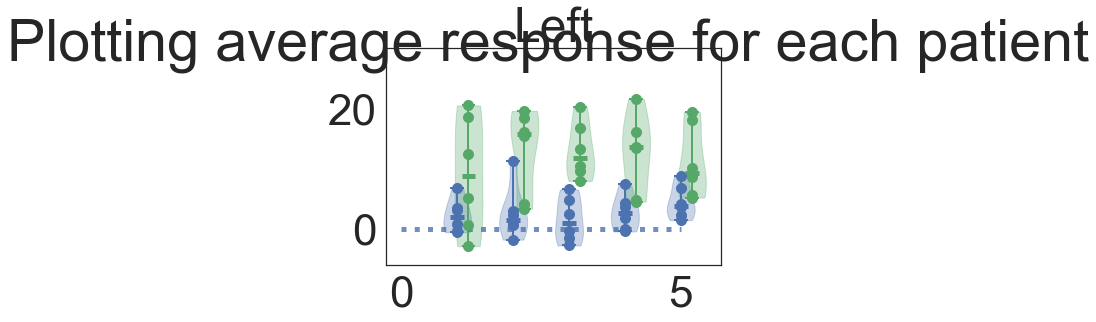

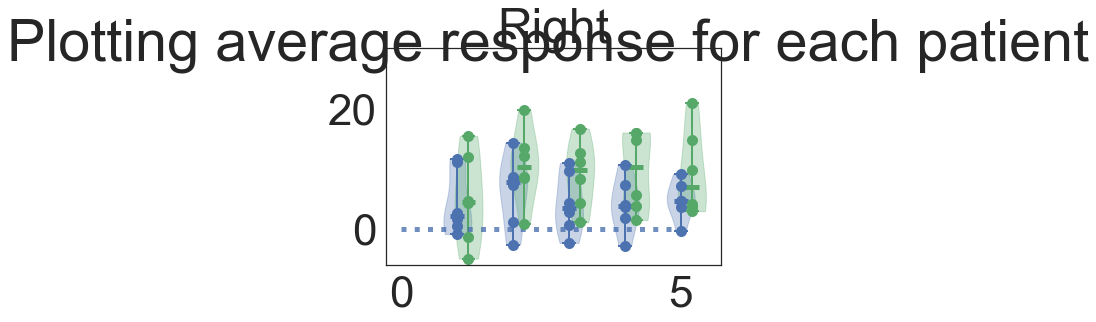

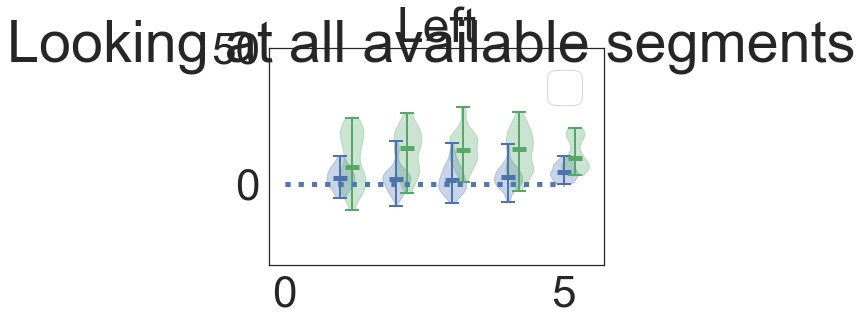

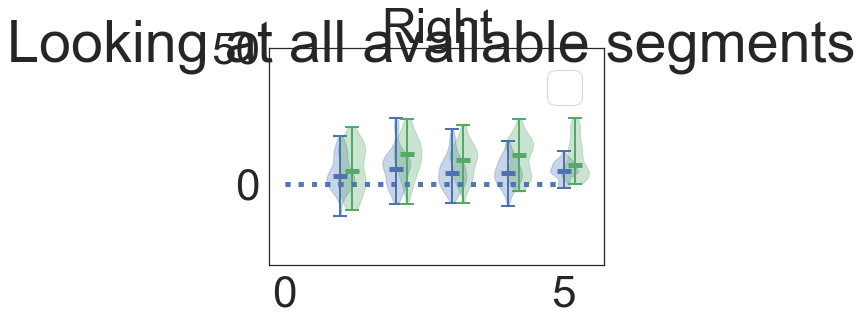

In [8]:

do_pts = ["901", "903", "905", "906", "907", "908"]
analysis = network_action.local_response(config_file="../../analysis/configs/stream_config.json",do_pts=do_pts)
analysis.extract_baselines()
analysis.extract_response()
analysis.gen_osc_distr()

#%%
# Results plotting

analysis.plot_responses(do_pts=do_pts)

analysis.plot_patient_responses()


analysis.plot_segment_responses(do_pts=do_pts)




## EEG Response

/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/mne/channels/montage.py:186: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

Doing standard init pipeline
Pooling Patient Observations
Computing Bootstrap Median Response for POOL
Plotting Distribution for Bands


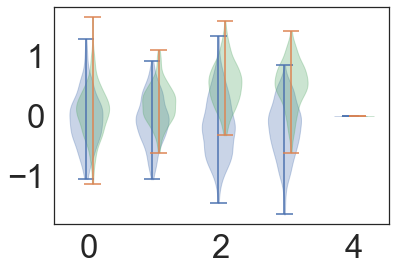

In [10]:
from dbspace.control import offline_segments
from dbspace.viz.MM import EEG_Viz

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper")
sns.set(font_scale=3)
sns.set_style("white")

pt_list = ["906", "907", "908"]

# The feature vector, in this case the frequencies
fvect = np.linspace(0, 500, 513)
do_coherence = False

## Basic initialization methods, need to suppress figures from these and clean these up
eFrame = offline_segments.network_action_dEEG(config_file="../../analysis/configs/targeting_experiment.json",
    pts=pt_list, procsteps="conservative", condits=["OnT", "OffT"]
)
eFrame.standard_pipeline()
eFrame.band_distrs()